<h2><a href="https://leetcode.com/problems/minimum-absolute-difference-queries/">1906. Minimum Absolute Difference Queries</a></h2><h3>Medium</h3><hr><p>The <strong>minimum absolute difference</strong> of an array <code>a</code> is defined as the <strong>minimum value</strong> of <code>|a[i] - a[j]|</code>, where <code>0 &lt;= i &lt; j &lt; a.length</code> and <code>a[i] != a[j]</code>. If all elements of <code>a</code> are the <strong>same</strong>, the minimum absolute difference is <code>-1</code>.</p>

<ul>
	<li>For example, the minimum absolute difference of the array <code>[5,<u>2</u>,<u>3</u>,7,2]</code> is <code>|2 - 3| = 1</code>. Note that it is not <code>0</code> because <code>a[i]</code> and <code>a[j]</code> must be different.</li>
</ul>

<p>You are given an integer array <code>nums</code> and the array <code>queries</code> where <code>queries[i] = [l<sub>i</sub>, r<sub>i</sub>]</code>. For each query <code>i</code>, compute the <strong>minimum absolute difference</strong> of the <strong>subarray</strong> <code>nums[l<sub>i</sub>...r<sub>i</sub>]</code> containing the elements of <code>nums</code> between the <strong>0-based</strong> indices <code>l<sub>i</sub></code> and <code>r<sub>i</sub></code> (<strong>inclusive</strong>).</p>

<p>Return <em>an <strong>array</strong> </em><code>ans</code> <em>where</em> <code>ans[i]</code> <em>is the answer to the</em> <code>i<sup>th</sup></code> <em>query</em>.</p>

<p>A <strong>subarray</strong> is a contiguous sequence of elements in an array.</p>

<p>The value of <code>|x|</code> is defined as:</p>

<ul>
	<li><code>x</code> if <code>x &gt;= 0</code>.</li>
	<li><code>-x</code> if <code>x &lt; 0</code>.</li>
</ul>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> nums = [1,3,4,8], queries = [[0,1],[1,2],[2,3],[0,3]]
<strong>Output:</strong> [2,1,4,1]
<strong>Explanation:</strong> The queries are processed as follows:
- queries[0] = [0,1]: The subarray is [<u>1</u>,<u>3</u>] and the minimum absolute difference is |1-3| = 2.
- queries[1] = [1,2]: The subarray is [<u>3</u>,<u>4</u>] and the minimum absolute difference is |3-4| = 1.
- queries[2] = [2,3]: The subarray is [<u>4</u>,<u>8</u>] and the minimum absolute difference is |4-8| = 4.
- queries[3] = [0,3]: The subarray is [1,<u>3</u>,<u>4</u>,8] and the minimum absolute difference is |3-4| = 1.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> nums = [4,5,2,2,7,10], queries = [[2,3],[0,2],[0,5],[3,5]]
<strong>Output:</strong> [-1,1,1,3]
<strong>Explanation: </strong>The queries are processed as follows:
- queries[0] = [2,3]: The subarray is [2,2] and the minimum absolute difference is -1 because all the
  elements are the same.
- queries[1] = [0,2]: The subarray is [<u>4</u>,<u>5</u>,2] and the minimum absolute difference is |4-5| = 1.
- queries[2] = [0,5]: The subarray is [<u>4</u>,<u>5</u>,2,2,7,10] and the minimum absolute difference is |4-5| = 1.
- queries[3] = [3,5]: The subarray is [2,<u>7</u>,<u>10</u>] and the minimum absolute difference is |7-10| = 3.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>2 &lt;= nums.length &lt;= 10<sup>5</sup></code></li>
	<li><code>1 &lt;= nums[i] &lt;= 100</code></li>
	<li><code>1 &lt;= queries.length &lt;= 2&nbsp;* 10<sup>4</sup></code></li>
	<li><code>0 &lt;= l<sub>i</sub> &lt; r<sub>i</sub> &lt; nums.length</code></li>
</ul>


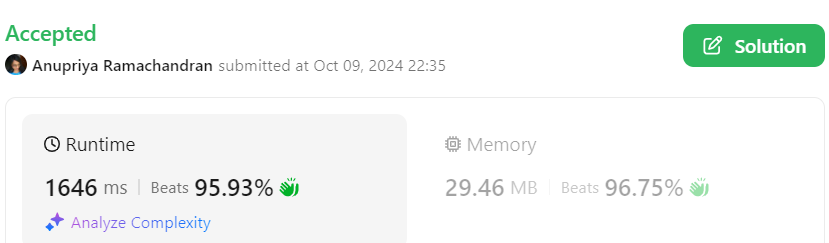

In [2]:
import math
from typing import List

class Query:
    def __init__(self, left, right, index):
        self.left = left
        self.right = right
        self.index = index

class Solution:
    def minDifference(self, nums: List[int], queries: List[List[int]]) -> List[int]:
        n = len(nums)
        q = len(queries)

        blocksize = math.ceil(math.sqrt(n))
        queries = [Query(query[0], query[1], i) for i, query in enumerate(queries)]
        queries.sort(key = lambda q : (q.left//blocksize , q.right))

        currentleft, currentright = 0, -1
        min_difference = -math.inf
        count = [0]* 101

        ans = [0]* q
        for query in queries:
            left = query.left
            right = query.right

            while currentright < right:
                currentright += 1
                count[nums[currentright]] += 1

            while currentright > right:
                count[nums[currentright]] -= 1
                currentright -= 1
                
            while currentleft < left:
                count[nums[currentleft]] -= 1
                currentleft += 1

            while currentleft > left:
                currentleft -= 1
                count[nums[currentleft]] += 1

            currentdiff =  self.find_min_difference(count)
            ans[query.index] = currentdiff if currentdiff != math.inf else -1

        return ans

    def find_min_difference(self, count):
        min_diff = math.inf
        i = 0
        prev = -1
        while i < 101:
            if count[i] > 0:
                if prev != -1:
                    diff = abs(i - prev)
                    if diff < min_diff:
                        min_diff = diff
                prev = i
            i += 1
        
        return min_diff

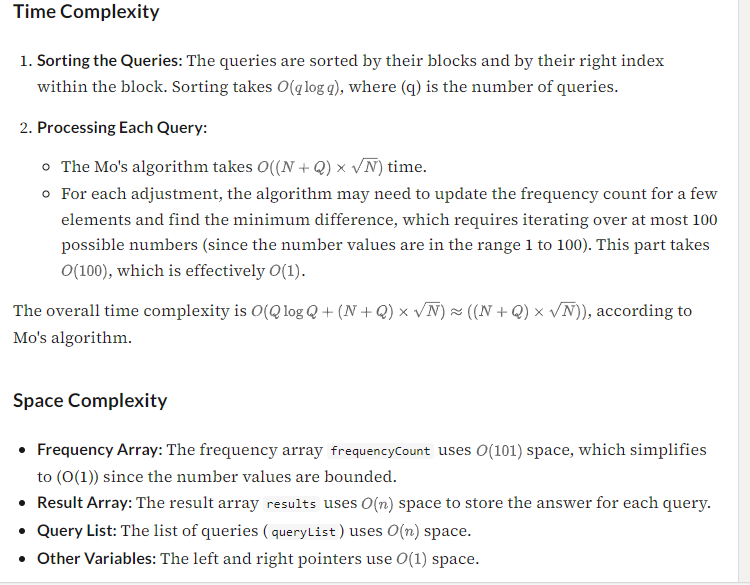